In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/austinmartinez12/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Mean Salmon Catches Per Region'}, xlabel='Mean Salmon Catches', ylabel='Regions'>

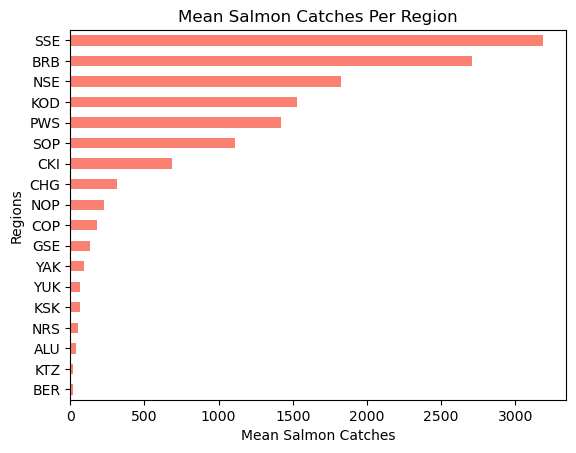

In [46]:
# FINAL CODE

# Import pandas and numpy as pd and np
import pandas as pd

# Read in data using pd.read_csv() and assign it to catch_data
catch_data = pd.read_csv("data/salmon_data.csv")

# Remove the notesRegCode column from the catch_data DataFrame using .drop()
catch_data = catch_data.drop(columns = "notesRegCode")

# Replace values in the Catch column where the value is 'I' and replace it with a 1 
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)

# Change the data type of the Catch column from object to int64 
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Use Group by to find the mean amount of salmon catches in each Region and assign the output to avg_region
avg_region = catch_data.groupby("Region")["Catch"].mean()

# Make a barplot of the mean amount of salmon catches in each Region
avg_region.sort_values().plot(kind="barh", 
                              title = "Mean Salmon Catches Per Region",
                              xlabel = "Mean Salmon Catches",
                              ylabel = "Regions",
                              color = "Salmon")

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.
# Import pandas and numpy as pd and np
import pandas as pd
import numpy as np

# Read in data using pd.read_csv() and assign it to catch_data
catch_data = pd.read_csv("data/salmon_data.csv")

# Use .head() to see the first 5 rows of the catch_data DataFrame
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b.

# Print the data types of column in the catch_data DataFrame using `.dtypes`
print(catch_data.dtypes)

# Print a tuple showing the amount of (rows,columns) in the catch_data DataFrame using `.shape`
print(catch_data.shape)

# Print the amount of NAs in each column of the catch_data DataFrame using `.isna().sum()`
print(catch_data.isna().sum())


Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
(8540, 5)
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

In part b, I used `print(catch_data.dtypes)` to see the data types of each of the variables. With this function I was able to confirm that all the variables are in the proper data type, besides the Year column. I used `print(catch_data.shape)` to figure out how many columns and rows are in this data set. With this function I was able to find out the catch_data dataframe has 8540 rows and 5 columns. I used `print(catch_data.isna().sum())` to figure out how many NAs I have in each column. With this code chunk I was able to figure out I have 7125 NAs in the notesRegCode column.


<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Store the unique values in the notesRegCode column in the catch_data with `.unique()` in notes_unique
notes_unique = catch_data["notesRegCode"].unique()

# Print the unique values stores in notes_unique
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [6]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Remove the notesRegCode column from the catch_data DataFrame using .drop()
catch_data = catch_data.drop(columns = "notesRegCode")

# Print columns to check if notesRegCode was removed
catch_data.columns

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

In [8]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


All columns have the expected data types except for the Year and Catch columns. The Catch column is stored as an object instead of a int64, and the Year column is stored as an int64 instead of a datetime data format.

In [9]:
# Print the data types of column in the catch_data DataFrame using `.dtypes`
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [10]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [11]:
# Select rows where Catch column has the value 'I' and store them in catch_I
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [12]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [13]:
# Select rows where the Catch value is 'I' and replace it with 1 and assign it to catch_1
catch_1 = catch_I[catch_I['Catch'] == 'I'].replace("I", 1)

# Print catch_1
catch_1

/tmp/ipykernel_3117132/244320485.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  catch_1 = catch_I[catch_I['Catch'] == 'I'].replace("I", 1)


,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [32]:
# Replace values in the Catch column where the value is 'I' and replace it with a 1 
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)

# Change the data type of the Catch column from object to int64 
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Print the data type of the Catch column and assign it to catch_column_type
catch_column_type = catch_data['Catch'].dtype

In [26]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [29]:
# Use Group by to find the mean amount of salmon catches in each Region and assign the output to avg_region
avg_region = catch_data.groupby("Region")["Catch"].mean()

# Print catch_1
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

In [30]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Mean Salmon Catches Per Region'}, xlabel='Mean Salmon Catches', ylabel='Regions'>

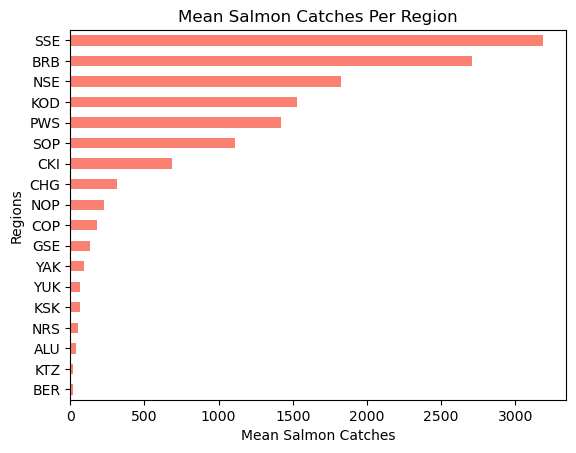

In [43]:
# Make a barplot of the mean amount of salmon catches in each Region
avg_region.sort_values().plot(kind="barh", 
                              title = "Mean Salmon Catches Per Region",
                              xlabel = "Mean Salmon Catches",
                              ylabel = "Regions",
                              color = "Salmon")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The plot above shows the mean salmon catches per region from 1878 to 1997 in descending order. The three regions with the highest average salmon catches were Southern Southeast Alaska (3,184.66), Bristol Bay Management Area (2,709.80), and Northern Southeast Alaska (1,825.02). The three regions with the lowest average salmon catches were Aleutian Islands Subarea (40.38), Kotzebue Management Area (18.84), and Bering River Subarea (16.37).

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!